# __04 Representing Data and Engineering Features__

## __One-Hot Encoding__

By far the most common way to represent categorical variables is using the one-hot-
encoding or one-out-of-N encoding, also known as dummy variables. The idea behind
dummy variables is to replace a categorical variable with one or more new features
that can have the values 0 and 1. The values 0 and 1 make sense in the formula for
linear binary classification (and for all other models in `scikit-learn`), and we can
represent any number of categories by introducing one new feature per category.

In [2]:
import pandas as pd

# the file has no headers naming the colimns, so we pass
# header = None, and provide the column names explicitly
data = pd.read_csv(
    'input/adult.data', header = None, index_col = False,
    names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'race', 'gender',
        'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
        'income'
    ]
)

# for illusgration purposes, we only select some of the columns
data = data[
    ['age', 'workclass', 'education', 'gender', 'hours_per_week', 'occupation', 'income']
]

data.head()

,age,workclass,education,gender,hours_per_week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
# use value counts to analyze categorical repetitions
data['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [7]:
# get dummie vars in pandas is straightforward
print('original features:\n', data.columns.to_list(), '\n')
data_dummies = pd.get_dummies(data)
print('features after get_dummies:\n', data_dummies.columns.to_list())

original features:
 ['age', 'workclass', 'education', 'gender', 'hours_per_week', 'occupation', 'income'] 

features after get_dummies:
 ['age', 'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [8]:
data_dummies.head()

,age,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


We can now use the values attribute to convert the data_dummies DataFrame into a
NumPy array, and then train a machine learning model on it. Be careful to separate
the target variable (which is now encoded in two income columns) from the data
before training a model. Including the output variable, or some derived property of
the output variable, into the feature representation is a very common mistake in
building supervised machine learning models.

In this case, we extract only the columns containing features—that is, all columns
from age to occupation_ Transport-moving . This range contains all the features but
not the target:

In [12]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# extract numpy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print(f'X.shape: {X.shape}   y.shape: {y.shape}')

X.shape: (32561, 44)   y.shape: (32561,)


In [14]:
# data is tidy and ready to be used for scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 0
)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

print(f'test score: {logreg.score(X_test, y_test):.2f}')

test score: 0.81


## __Numbers Can Encode Categoricals__

The get_dummies function in pandas treats all numbers as continuous and will not
create dummy variables for them. To get around this, you can either use scikit-
learn ’s OneHotEncoder , for which you can specify which variables are continuous
and which are discrete, or convert numeric columns in the DataFrame to strings. To
illustrate, let’s create a DataFrame object with two columns, one containing strings
and one containing integers:

In [21]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame(
   {
       'Integer Feature': [0, 1, 3, 1],
       'Categorical Feature': ['socks', 'fox', 'socks', 'box']
   }
)
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,3,socks
3,1,box


In [22]:
# using get_dummies will only encode the string feature
# and will not change the integer feature
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,3,0,0,1
3,1,1,0,0


If you want dummy variables to be created for the “Integer Feature” column, you can
explicitly list the columns you want to encode using the columns parameter. Then,
both features will be treated as categorical

In [23]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns = ['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_3,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## __Binning, Discretization, Linear Models and Trees__

The best way to represent data depends not only on the semantics of the data, but also
on the kind of model you are using. Linear models and tree-based models (such as
decision trees, gradient boosted trees, and random forests), two large and very com‐
monly used families, have very different properties when it comes to how they work
with different feature representations.

Let’s go back to the wave regression dataset that
we used in Chapter 2. It has only a single input feature. Here is a comparison of a
linear regression model and a decision tree regressor on this dataset

In [29]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

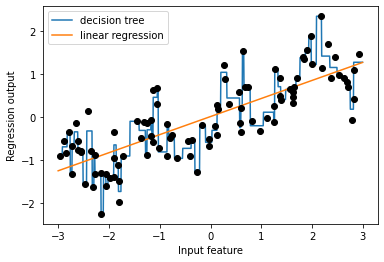

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = 'decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label = 'linear regression')

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc = 'best')
plt.show()

As you know, linear models can only model linear relationships, which are lines in
the case of a single feature. The decision tree can build a much more complex model
of the data. However, this is strongly dependent on the representation of the data.
One way to make linear models more powerful on continuous data is to use binning
(also known as discretization) of the feature to split it up into multiple features, as
described here.

We imagine a partition of the input range for the feature (in this case, the numbers
from –3 to 3) into a fixed number of bins—say, 10. A data point will then be repre‐
sented by which bin it falls into. To determine this, we first have to define the bins. In
this case, we’ll define 10 bins equally spaced between –3 and 3. We use the
np.linspace function for this, creating 11 entries, which will create 10 bins—they are
the spaces in between two consecutive boundaries:

In [32]:
bins = np.linspace(-3, 3, 11)
print(f'bins: {bins}')

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [33]:
which_bin = np.digitize(X, bins = bins)
print(f'data points:\n', X[:5])
print(f'bin membership for data points:\n', which_bin[:5])

data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


What we did here is transform the single continuous input feature in the wave dataset
into a categorical feature that encodes which bin a data point is in. To use a scikit-
learn model on this data, we transform this discrete feature to a one-hot encoding
using the OneHotEncoder from the preprocessing module. The OneHotEncoder does
the same encoding as pandas.get_dummies , though it currently only works on cate‐
gorical variables that are integers:

In [34]:
from sklearn.preprocessing import OneHotEncoder

# transform using OneHotEncoder
encoder = OneHotEncoder(sparse = False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)

print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
# we specified 10 bins, so we may expect a shape related to this
print(f'X_binned.shape: {X_binned.shape}')

X_binned.shape: (100, 10)


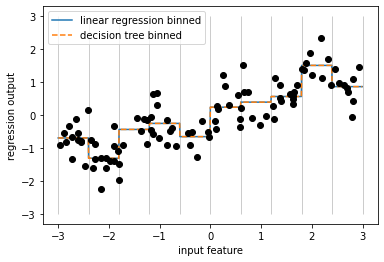

In [42]:
# build a new linear regression model with the one-hot-encoded
# data
line_binned = encoder.transform(np.digitize(line, bins = bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'linear regression binned')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label = 'decision tree binned')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(bins, -3, 3, linewidth = 1, alpha = 0.2)
plt.legend(loc = 'best')
plt.ylabel('regression output')
plt.xlabel('input feature')
plt.show()

The dashed line and solid line are exactly on top of each other, meaning the linear
regression model and the decision tree make exactly the same predictions. For each
bin, they predict a constant value. As features are constant within each bin, any
model must predict the same value for all points within a bin. Comparing what the
models learned before binning the features and after, we see that the linear model
became much more flexible, because it now has a different value for each bin, while
the decision tree model got much less flexible. Binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data any‐
where. In a sense, that means decision trees can learn whatever binning is most useful
for predicting on this data. Additionally, decision trees look at multiple features at
once, while binning is usually done on a per-feature basis. However, the linear model
benefited greatly in expressiveness from the transformation of the data.
If there are good reasons to use a linear model for a particular dataset—say, because it
is very large and high-dimensional, but some features have nonlinear relations with
the output—binning can be a great way to increase modeling power.

## __Interactions and Polynomials__

Another way to enrich a feature representation, particularly for linear models, is
adding interaction features and polynomial features of the original data. This kind of
feature engineering is often used in statistical modeling, but it’s also common in many
practical machine learning applications.

One way to add a slope to the linear model on the binned
data is to add the original feature (the x-axis in the plot) back in.

In [45]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


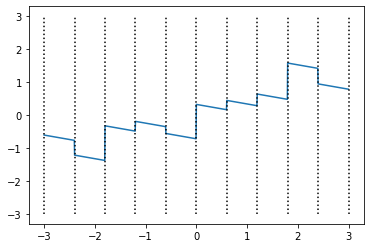

In [46]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = 'linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c = 'k')

In this example, the model learned an offset for each bin, together with a slope. The
learned slope is downward, and shared across all the bins—there is a single x-axis fea‐
ture, which has a single slope. Because the slope is shared across all bins, it doesn’t
seem to be very helpful. We would rather have a separate slope for each bin! We can
achieve this by adding an interaction or product feature that indicates which bin a
data point is in and where it lies on the x-axis. This feature is a product of the bin
indicator and the original feature. Let’s create this dataset:

In [47]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


The dataset now has 20 features: the indicators for which bin a data point is in, and a
product of the original feature and the bin indicator.

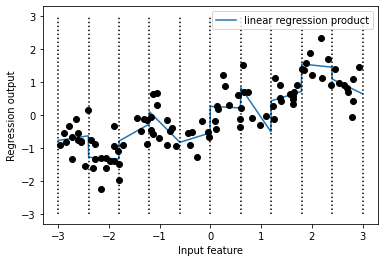

In [49]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = 'linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c = 'k')

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc = 'best')
plt.show()

As you can see, now each bin has its own offset and slope in this model.

Using binning is one way to expand a continuous feature. Another one is to use poly‐
nomials of the original features. For a given feature x , we might want to consider
x ** 2 , x ** 3 , x ** 4 , and so on. This is implemented in PolynomialFeatures in
the preprocessing module:

In [50]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10
# the default include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [51]:
print(f'X_poly.shape: {X_poly.shape}')

X_poly.shape: (100, 10)


In [52]:
print('Entries of X:\n', X[:5])
print('Entries of X_poly:\n', X_poly[:5])

Entries of X:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [53]:
print('Polynomial feature names:\n', poly.get_feature_names())

Polynomial feature names:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


You can see that the first column of X_poly corresponds exactly to X , while the other
columns are the powers of the first entry. It’s interesting to see how large some of the
values can get. The second column has entries above 20,000, orders of magnitude dif‐
ferent from the rest.
Using polynomial features together with a linear regression model yields the classical
model of polynomial regression

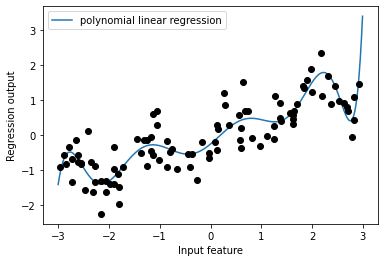

In [55]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = 'polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc = 'best')
plt.show()

As you can see, polynomial features yield a very smooth fit on this one-dimensional
data. However, polynomials of high degree tend to behave in extreme ways on the
boundaries or in regions with little data.

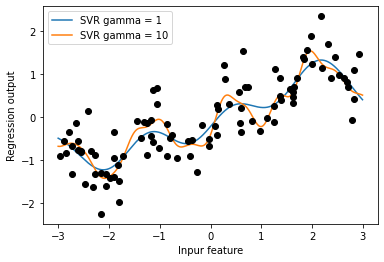

In [57]:
# comaprison to a kernel SVM
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = f'SVR gamma = {gamma}')

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('Regression output')
plt.xlabel('Inpur feature')
plt.legend(loc = 'best')
plt.show()

Using a more complex model, a kernel SVM, we are able to learn a similarly complex
prediction to the polynomial regression without an explicit transformation of the
features.

In [59]:
# play with interactiond an polynomials with bosyons dataset
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state = 0
)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# extrract polynomial features and interactions
# up to 2nd degree
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f'X_train.shape: {X_train.shape}')
print(f'X_train_poly.shape: {X_train_poly.shape}')

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


The data originally had 13 features, which were expanded into 105 interaction fea‐
tures. These new features represent all possible interactions between two different
original features, as well as the square of each original feature. degree=2 here means
that we look at all features that are the product of up to two original features. The
exact correspondence between input and output features can be found using the
get_feature_names method:

In [62]:
print(f'Polynomial feature names:\n{poly.get_feature_names()}')

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


The first new feature is a constant feature, called "1" here. The next 13 features are
the original features (called "x0" to "x12" ). Then follows the first feature squared
( "x0^2" ) and combinations of the first and the other features.
Let’s compare the performance using Ridge on the data with and without interac‐
tions:

In [65]:
from sklearn.linear_model import Ridge


ridge = Ridge().fit(X_train_scaled, y_train)
print(f'Score without interactions: {ridge.score(X_test_scaled, y_test):.3f}')

ridge = Ridge().fit(X_train_poly, y_train)
print(f'Score with interactions: {ridge.score(X_test_poly, y_test):.3f}')

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in perfor‐
mance when using Ridge . When using a more complex model like a random forest,
the story is a bit different, though:

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100).fit(X_train_scaled, y_train)
print(f'Score without interactions: {rf.score(X_test_scaled, y_test):.3f}')

rf = RandomForestRegressor(n_estimators = 100).fit(X_train_poly, y_train)
print(f'Score with interactions: {rf.score(X_test_poly, y_test):.3f}')

Score without interactions: 0.797
Score with interactions: 0.762


You can see that even without additional features, the random forest beats the
performance of Ridge . Adding interactions and polynomials actually decreases per‐
formance slightly.

## __Univariate Nonlnear Transformation__